In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import SimpleITK as sitk
from pathlib import Path
from myshow import myshow, myshow3d
import numpy as np
import nibabel as nib
import os
from dipy.align.imaffine import AffineMap

/Users/naimsassine/.pyenv/versions/3.7.3/lib/python3.7/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
t2_train_table = pd.read_csv('E:/Memoire/ProstateX/generated/train/dataframes/training_meta_data.csv')

In [26]:
t2_case

Unnamed: 0                                                        16
ProxID                                                ProstateX-0010
DCMSerDescr                                               t2_tse_tra
resampled_nifti    E:/Memoire/ProstateX/generated/tra...
sequence_type                                                     t2
fid                                                                1
pos                                     (-31.8128, 51.364, -56.0047)
ijk                                                   (150, 213, 10)
zone                                                              PZ
ClinSig                                                        False
Name: 15, dtype: object

In [16]:
t2_case = t2_train_table.iloc[15]
adc = t2_train_table.iloc[345]
bval = t2_train_table.iloc[672]
ktrans = t2_train_table.iloc[1002]

In [17]:
t2_image = sitk.ReadImage(str(t2_case['resampled_nifti']))
adc_image = sitk.ReadImage(str(adc['resampled_nifti']))
bval_image = sitk.ReadImage(str(bval['resampled_nifti']))
ktrans_image = sitk.ReadImage(str(ktrans['resampled_nifti']))

In [18]:
t2_array = sitk.GetArrayFromImage(t2_image)
adc_array = sitk.GetArrayFromImage(adc_image)

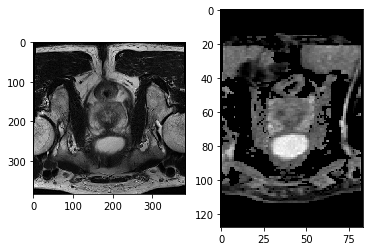

In [20]:
plt.figure()
plt.subplot(1,2,1)
plt.imshow(t2_array[10, :, :], 'gray', interpolation='none')
plt.subplot(1,2,2)
plt.imshow(adc_array[10, :, :], 'gray', interpolation='none')
plt.show()

In [25]:
ed = np.load('E:/Memoire/ProstateX/generated/mutli_class_segm/train_images_not_cropped/ProstateX-0010.npy')

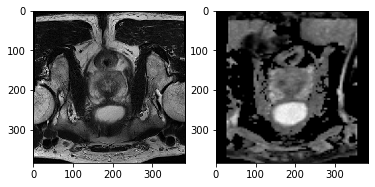

In [27]:
plt.figure()
plt.subplot(1,2,1)
plt.imshow(ed[10, :, :, 0], 'gray', interpolation='none')
plt.subplot(1,2,2)
plt.imshow(ed[10, :, :, 1], 'gray', interpolation='none')
plt.show()

In [21]:
import nibabel as nib
import os
from dipy.align.imaffine import AffineMap

In [22]:
t2 = nib.load(str(t2_case['resampled_nifti']))
ADC = nib.load(str(adc['resampled_nifti']))

t2_static = t2.get_fdata()
t2_static_grid2world = t2.affine

ADC_moving = ADC.get_fdata()
ADC_moving_grid2world = ADC.affine

identity = np.eye(4)
ADC_affine_map = AffineMap(identity, t2_static.shape, t2_static_grid2world, ADC_moving.shape, ADC_moving_grid2world)

transformADC = ADC_affine_map.transform(ADC_moving)

out = np.stack([t2_static.transpose(2,0,1), transformADC.transpose(2,0,1)], axis = -1)


In [13]:
ADC_moving_grid2world

array([[-1.99999833e+00,  4.14129564e-10, -3.77060333e-03,
         4.56854477e+01],
       [ 7.97223649e-04,  1.89675283e+00, -9.51439738e-01,
        -1.28171738e+02],
       [-2.38396740e-03,  6.34293675e-01,  2.84512711e+00,
        -9.75016556e+01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

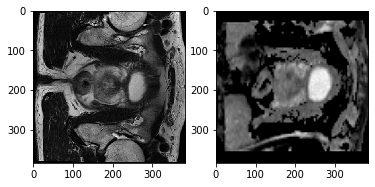

In [23]:
# overlay the registered
plt.figure()
plt.subplot(1,2,1)
plt.imshow(out[10, :, :, 0], 'gray', interpolation='none')
plt.subplot(1,2,2)
plt.imshow(out[10, :, :, 1], 'gray', interpolation='none', alpha=1)
plt.show()

In [101]:
# let's regesiter all the image types and see if it works for different patients!!
t2 = nib.load(str(t2_case['resampled_nifti']))
ADC = nib.load(str(adc['resampled_nifti']))
BVAL = nib.load(str(bval['resampled_nifti']))
KTRANS = nib.load(str(ktrans['resampled_nifti']))

t2_static = t2.get_data()
t2_static_grid2world = t2.affine

ADC_moving = ADC.get_data()
ADC_moving_grid2world = ADC.affine

identity = np.eye(4)
ADC_affine_map = AffineMap(identity, t2_static.shape, t2_static_grid2world, ADC_moving.shape, ADC_moving_grid2world)

transformADC = ADC_affine_map.transform(ADC_moving)


BVAL_moving = BVAL.get_data()
BVAL_moving_grid2world = BVAL.affine

identity = np.eye(4)
BVAL_affine_map = AffineMap(identity, t2_static.shape, t2_static_grid2world, BVAL_moving.shape, BVAL_moving_grid2world)

transformBVAL = BVAL_affine_map.transform(BVAL_moving)


KTRANS_moving = KTRANS.get_data()
KTRANS_moving_grid2world = KTRANS.affine

identity = np.eye(4)
KTRANS_affine_map = AffineMap(identity, t2_static.shape, t2_static_grid2world, KTRANS_moving.shape, KTRANS_moving_grid2world)

transformKTRANS = KTRANS_affine_map.transform(KTRANS_moving)


out = ([t2_static.transpose(2,0,1), transformADC.transpose(2,0,1), transformBVAL.transpose(2,0,1), transformKTRANS.transpose(2,0,1)], axis = -1)

ipykernel_launcher:7: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
ipykernel_launcher:10: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
ipykernel_launcher:19: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
ipyke

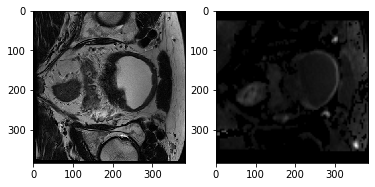

In [104]:
plt.figure()
plt.subplot(1,2,1)
plt.imshow(out[15, :, :, 0], 'gray', interpolation='none')
plt.subplot(1,2,2)
plt.imshow(out[15, :, :, 2], 'gray', interpolation='none')
plt.show()

In [59]:
t2_train_table = pd.read_csv('E:/Memoire/ProstateX/generated/train/dataframes/training_meta_data.csv')

t2_case = t2_train_table.iloc[15]
adc = t2_train_table.iloc[345]
bval = t2_train_table.iloc[672]
ktrans = t2_train_table.iloc[1002]

In [60]:
t2_image = sitk.ReadImage(str(t2_case['resampled_nifti']))
adc_image = sitk.ReadImage(str(adc['resampled_nifti']))
bval_image = sitk.ReadImage(str(bval['resampled_nifti']))
ktrans_image = sitk.ReadImage(str(ktrans['resampled_nifti']))

In [61]:
print(t2_image.GetSize())
print(adc_image.GetSize())
print(bval_image.GetSize())
print(ktrans_image.GetSize())

(384, 384, 19)
(84, 128, 19)
(84, 128, 19)
(128, 128, 12)


In [67]:
# let's create a function that will register eveyrthing, correct the rotations, and put them into a numpy
t2 = nib.load(str(t2_case['resampled_nifti']))
ADC = nib.load(str(adc['resampled_nifti']))
BVAL = nib.load(str(bval['resampled_nifti']))
KTRANS = nib.load(str(ktrans['resampled_nifti']))

t2_static = t2.get_fdata()
t2_static_grid2world = t2.affine

ADC_moving = ADC.get_fdata()
ADC_moving_grid2world = ADC.affine

identity = np.eye(4)
ADC_affine_map = AffineMap(identity, t2_static.shape, t2_static_grid2world, ADC_moving.shape, ADC_moving_grid2world)

transformADC = ADC_affine_map.transform(ADC_moving)


BVAL_moving = BVAL.get_fdata()
BVAL_moving_grid2world = BVAL.affine

identity = np.eye(4)
BVAL_affine_map = AffineMap(identity, t2_static.shape, t2_static_grid2world, BVAL_moving.shape, BVAL_moving_grid2world)

transformBVAL = BVAL_affine_map.transform(BVAL_moving)


KTRANS_moving = KTRANS.get_fdata()
KTRANS_moving_grid2world = KTRANS.affine

identity = np.eye(4)
KTRANS_affine_map = AffineMap(identity, t2_static.shape, t2_static_grid2world, KTRANS_moving.shape, KTRANS_moving_grid2world)

transformKTRANS = KTRANS_affine_map.transform(KTRANS_moving)


transposed_adc = transformADC.transpose(2,0,1)
for j in range(len(transposed_adc)) : 
    transposed_adc[j] = np.fliplr(np.flipud(np.rot90(np.fliplr(transposed_adc[j]), 3)))

transposed_bval = transformBVAL.transpose(2,0,1)
for j in range(len(transposed_bval)) : 
    transposed_bval[j] = np.fliplr(np.flipud(np.rot90(np.fliplr(transposed_bval[j]), 3)))

transposed_ktrans = transformKTRANS.transpose(2,0,1)
for j in range(len(transposed_ktrans)) : 
    transposed_ktrans[j] = np.fliplr(np.rot90(np.fliplr(transposed_ktrans[j]), 3))




out = np.stack([sitk.GetArrayViewFromImage(t2_image) , transposed_adc, transposed_bval, transposed_ktrans], axis = -1)


np.save('E:/Memoire/ProstateX/generated/mutli_class_segm/train_images_not_cropped/ProstateX-0046-Finding2-t2_tse_tra_ROI.nii.gz', out)

In [63]:
out.shape

(19, 384, 384, 4)

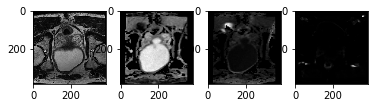

In [66]:
z = 15
plt.figure()
plt.subplot(1,4,1)
plt.imshow(out[z, :, :, 0], 'gray', interpolation='none')

plt.subplot(1,4,2)
plt.imshow(out[z, :, :, 1], 'gray', interpolation='none')

plt.subplot(1,4,3)
plt.imshow(out[z, :, :, 2], 'gray', interpolation='none')

plt.subplot(1,4,4)
plt.imshow(out[z, :, :, 3], 'gray', interpolation='none')

plt.show()

In [65]:
myshow(ktrans_image)
myshow(sitk.GetImageFromArray(out[:, :, :, 3]))

interactive(children=(IntSlider(value=5, description='z', max=11), Output()), _dom_classes=('widget-interact',…

interactive(children=(IntSlider(value=9, description='z', max=18), Output()), _dom_classes=('widget-interact',…

In [101]:
x = 0
t2_case = t2_train_table.iloc[x]
adc = t2_train_table.iloc[x + 330]
bval = t2_train_table.iloc[x + 657]
ktrans = t2_train_table.iloc[x + 987]
print(t2_case["ProxID"])
print(adc["ProxID"])
print(bval["ProxID"])
print(ktrans["ProxID"])

ProstateX-0000
ProstateX-0000
ProstateX-0000
ProstateX-0000


In [88]:
x = 5
y = 5
z = 5
if x == y == z : 
    print("lol")

lol


In [89]:
t2_train_table = pd.read_csv('E:/Memoire/ProstateX/generated/train/dataframes/training_meta_data.csv')

In [94]:
t2_train_table

,Unnamed: 0,ProxID,DCMSerDescr,resampled_nifti,sequence_type,fid,pos,ijk,zone,ClinSig
0,0,ProstateX-0000,t2_tse_tra,E:/Memoire/ProstateX/generated/tra...,t2,1,"(25.7457, 31.8707, -38.511)","(167, 224, 9)",PZ,True
1,1,ProstateX-0001,t2_tse_tra,E:/Memoire/ProstateX/generated/tra...,t2,1,"(-40.5367071921656, 29.320722668457, -16.70766...","(157, 186, 10)",AS,False
2,3,ProstateX-0002,t2_tse_tra,E:/Memoire/ProstateX/generated/tra...,t2,2,"(-2.058, 38.6752, -34.6104)","(203, 216, 10)",PZ,False
3,4,ProstateX-0002,t2_tse_tra,E:/Memoire/ProstateX/generated/tra...,t2,1,"(-27.0102, 41.5467, -26.0469)","(154, 217, 12)",PZ,True
4,5,ProstateX-0003,t2_tse_tra,E:/Memoire/ProstateX/generated/tra...,t2,1,"(22.1495, 31.2717, -2.45933)","(240, 205, 12)",TZ,False
...,...,...,...,...,...,...,...,...,...,...
1312,1420,ProstateX-0201,ProstateX-0201-ktrans,E:/Memoire/ProstateX/generated/tra...,ktrans,1,"(10.1826, -10.0427, 20.9151)","(74, 65, 10)",AS,True
1313,1421,ProstateX-0202,ProstateX-0202-ktrans,E:/Memoire/ProstateX/generated/tra...,ktrans,1,"(-0.02085, -44.5506, 16.7349)","(67, 61, 6)",AS,True
1314,1422,ProstateX-0202,ProstateX-0202-ktrans,E:/Memoire/ProstateX/generated/tra...,ktrans,2,"(-12.8649, -21.7307, 7.76273)","(60, 74, 5)",PZ,False
1315,1423,ProstateX-0203,ProstateX-0203-ktrans,E:/Memoire/ProstateX/generated/tra...,ktrans,1,"(-10.02681, -18.5905, -75.1691)","(59, 56, 7)",AS,True


In [123]:
t2_train_table.iloc[385]

Unnamed: 0                                                       475
ProxID                                                ProstateX-0039
DCMSerDescr                                ep2d_diff_tra_dyndist_adc
resampled_nifti    E:/Memoire/ProstateX/generated/tra...
sequence_type                                                    adc
fid                                                                1
pos                                      (-29.2205, 47.977, 66.1721)
ijk                                                     (29, 73, 14)
zone                                                              PZ
ClinSig                                                        False
Name: 385, dtype: object